In [1]:
# Importing the library
import cv2
import numpy as np
%config Completer.use_jedi = False 
image_path = '../images/'

In [2]:
# Creating a function to show and close window

def show_one_image(image_file):

    cv2.imshow('image', image_file)

    while True:
        k = cv2.waitKey(0)

        if k != 27:
            print('If you want to close, please press ESC')

        if k == 27:
            print('\nESC Pressed, closing window...')
            cv2.destroyAllWindows()
            break

### ابعاد تصویر 

هر تصویر دارای سه ویژگی ابعادی می باشد.

ارتفاع تصویر یا تعداد سطرها

طول تصویر یا تعداد ستون ها

و تعداد کانال های رنگ تصویر 

height(h), width(w), channels(ch) = image.shape

rows , cols, ch = image.shape

In [ ]:
img = cv2.imread(image_path + 'home.jpg')

h, w, ch = img.shape

print('Height: %g, width: %g, Channles: %g'%(h,w,ch))

show_one_image(img)

### برش تصویر

برای برش تصویر و انتخاب قسمت دلخواه باید پیکسل های مورد نظر را از تصویر جدا کنیم

RoI : Region of Interest

### برش تصویر و نمایش تصویر اصلی و برش خورده

In [4]:
img = cv2.imread(image_path + 'squirrel_cls.jpg')

h, w, ch = img.shape

print('Height: %g, width: %g, Channles: %g'%(h,w,ch))

image_rect = cv2.rectangle(img, (124, 123), (361, 363), (0, 0, 255), 2)

img_cropped = img[124:361, 123:363]

cv2.imshow('Original Image', image_rect)

cv2.imshow('Image Cropped', img_cropped)

while True:
    k = cv2.waitKey(0)
    
    if k != 27:
        print('If you want to close, please press ESC')
    
    if k == 27:
        print('\nESC Pressed, closing window...')
        cv2.destroyAllWindows()
        break

Height: 426, width: 535, Channles: 3

ESC Pressed, closing window...


In [3]:
# crop a rectangle in video

vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()

    if ret:
        # Crop a part
        cropped_img = frame[124:361, 123:363]
        # Show the video
        cv2.imshow('Cropped Video', cropped_img)
        cv2.rectangle(frame, (124,123), (361,363), (255, 0, 0), 1)
        cv2.imshow('Original Video', frame)
        k = cv2.waitKey(25) & 0xFF
        if k == 27:
            break
    else:
        break

vid.release()
cv2.destroyAllWindows()

### cv2.selectROI()

In [5]:
img = cv2.imread(image_path + 'squirrel_cls.jpg')

cv2.selectROI('img', img, False)

k = cv2.waitKey(0)

if k == 27:
    cv2.destroyAllWindows()


### خروجی این تابع چیست؟؟؟

In [10]:
# Coordinates and dimension of the rectangle

img = cv2.imread(image_path + 'squirrel_cls.jpg')

x, y, w, h = cv2.selectROI('img', img, False)

k = cv2.waitKey(0)
if k == 27:

    cv2.destroyAllWindows()

In [11]:
x, y

(260, 87)

In [12]:
w, h

(264, 178)

In [13]:
img_cropped = img[y: y + h, x: x+w]
show_one_image(img_cropped)


ESC Pressed, closing window...


### جداسازی کانال های رنگ تصویر

In [14]:
# Seperating color channels by array filtering

img = cv2.imread(image_path + 'home.jpg')

h, w, ch = img.shape

img_blue = img[:,:,0]    # Only Blue Channel 

img_green = img[:,:,1]    # Only Green Channel 

img_red = img[:,:,2]    # Only Red Channel 

cv2.imshow('Original image', img)

cv2.imshow('image_blue', img_blue)

cv2.imshow('img_green', img_green)

cv2.imshow('img_red', img_red)

while True:
    k = cv2.waitKey(0)
    
    if k != 27:
        print('If you want to close, please press ESC')
    
    if k == 27:
        print('\nESC Pressed, closing window...')
        cv2.destroyAllWindows()
        break


ESC Pressed, closing window...


In [17]:
# Seperating color channels Using cv2.split()

img = cv2.imread(image_path + 'home.jpg')

h, w, ch = img.shape

# img_blue = img[:,:,0]    # Only Blue Channel 

# img_green = img[:,:,1]    # Only Green Channel 

# img_red = img[:,:,2]    # Only Red Channel 


b, g, r = cv2.split(img)

cv2.imshow('Original image', img)

cv2.imshow('image_blue', b)

cv2.imshow('img_green', g)

cv2.imshow('img_red', r)

while True:
    k = cv2.waitKey(0)
    
    if k != 27:
        print('If you want to close, please press ESC')
    
    if k == 27:
        print('\nESC Pressed, closing window...')
        cv2.destroyAllWindows()
        break


ESC Pressed, closing window...


### تغییر رنگ پیکسل ها بصورت دستی با استفاده از حلقه ها

برای تغییر رنگ پیکسل ها بصورت دستی از سه روش می توان استفاده نمود

**روش میانگین** : در این روش مقدار هر پیکسل در کانال های رنگی با هم جمع و به عدد سه تقسیم می شود

**روش میانگین وزنی یا درخشندگی** : به مقدار هر پیکسل در کانال ها وزنی اختصاص داده می شود مطابق فرمول زیر

gray = 0.21 x Red + 0.72 x Green + 0.07 x Blue

**روش روشنایی** : حداکثر و حداقل مقادیر روشنایی کانال ها با هم جمع و به عدد دو تقسیم می شود


In [16]:
# create an empty array according to image size
changed_color_array = np.zeros((h, w), dtype= np.uint8)
show_one_image(changed_color_array)


ESC Pressed, closing window...


In [19]:
# Using Luminisity method

img = cv2.imread(image_path + 'squirrel_cls.jpg')

h, w, ch = img.shape

# create an empty array according to image size
changed_color_array = np.zeros((h, w), dtype= np.uint8)

# Iterate over width and height of image
for i in range(w):
    for j in range(h):
        Blue_channel = img[j,i][0]
        Green_channel = img[j,i][1]
        Red_channel = img[j,i][2]
#         Using Luminisity method
        changed_color_array[j,i] = 0.21 * Red_channel + 0.72 * Green_channel + 0.07 * Blue_channel

show_one_image(changed_color_array)


ESC Pressed, closing window...


In [20]:
# Using AVERAGE method

img = cv2.imread(image_path + 'squirrel_cls.jpg')

h, w, ch = img.shape

# create an empty array according to image size
changed_color_array = np.zeros((h, w), dtype= np.uint8)

# Iterate over width and height of image
for i in range(w):
    for j in range(h):
        Blue_channel = img[j,i][0]
        Green_channel = img[j,i][1]
        Red_channel = img[j,i][2]

        #         Using AVERAGE method
        changed_color_array[j,i] = (Red_channel + Green_channel + Blue_channel)/3

show_one_image(changed_color_array)

C:\Users\javan\AppData\Local\Temp/ipykernel_13628/330374486.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
  changed_color_array[j,i] = (Red_channel + Green_channel + Blue_channel)/3



ESC Pressed, closing window...


### تغییر رنگ بندی تصویر بوسیله تابع 
### applyColorMap()

#### cv2.applyColorMap(img, COLORMAP)

### https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py

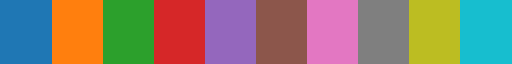

In [21]:
# import colormap from matplotlib

from matplotlib import cm   

table_10 = cm.tab10
table_10

In [22]:
table_10 = cm.tab10.colors
table_10        # the color values are scaled from 0 to 1  ----> to use in OpenCV we have to scale up to 255

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))

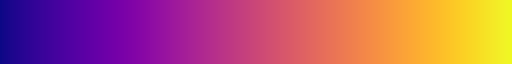

In [21]:
new_pallet = cm.plasma
new_pallet

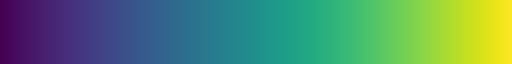

In [23]:
cm.viridis

In [24]:
import cv2

# Reading the Gray images
img = cv2.imread(image_path + 'squirrel_cls.jpg' )
img1 = cv2.imread(image_path + 'squirrel_cls.jpg', 0)


# Options for cv2.applyColorMap  ----> RAINBOW, BONE, AUTUMN, ...
# Converting to desired colormap (Rainbow)
colormap_Rainbow_img = cv2.applyColorMap(img1, cv2.COLORMAP_RAINBOW)

# Converting to desired colormap (Bone)
colormap_Bone_img = cv2.applyColorMap(img1, cv2.COLORMAP_BONE)

# Converting to desired colormap (AUTUMN)
colormap_Autumn_img = cv2.applyColorMap(img1, cv2.COLORMAP_AUTUMN)

# Showing the results
cv2.imshow('image', img)
cv2.imshow('image 1', img1)
cv2.imshow('colormap_Rainbow_img', colormap_Rainbow_img)
cv2.imshow('colormap_Bone_img', colormap_Bone_img)
cv2.imshow('colormap_Autumn_img', colormap_Autumn_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Use Matplotlib Color map with OpenCV

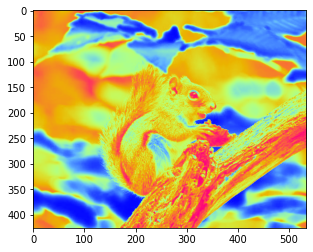

In [32]:
import matplotlib.pyplot as plt

# Reading the Gray images
img1 = cv2.imread(image_path + 'squirrel_cls.jpg', 0)

# we have to convert the colormap to np.unint8 and scale up to 255 to be applicable by OpenCV
cm_converted = np.uint8(cm.rainbow(img1)*255)   # cm.plasma

cm_converted = cv2.cvtColor(cm_converted, cv2.COLOR_BGR2RGB )
plt.imshow(cm_converted)


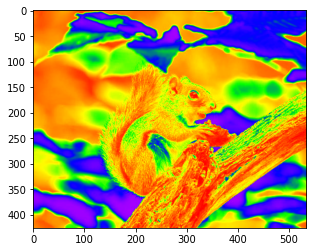

In [33]:
# The same color map in OpenCV

# Reading the Gray images
img1 = cv2.imread(image_path + 'squirrel_cls.jpg', 0)

# Options for cv2.applyColorMap  ----> RAINBOW, BONE, AUTUMN, ...
# Converting to desired colormap (Rainbow)
colormap_Rainbow_img = cv2.applyColorMap(img1, cv2.COLORMAP_RAINBOW)
colormap_Rainbow_img = cv2.cvtColor(colormap_Rainbow_img, cv2.COLOR_BGR2RGB)

plt.imshow(colormap_Rainbow_img)

### Apply colormap on Video

In [25]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()

    if ret:
        # Convert to gray
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Apply colormap
        colormap_Rainbow_img = cv2.applyColorMap(frame_gray, cv2.COLORMAP_RAINBOW)
        # Show the video
        cv2.imshow('Video', colormap_Rainbow_img)
        cv2.imshow('Original Video', frame)
        k = cv2.waitKey(25) & 0xFF
        if k == 27:
            break
    else:
        break

vid.release()
cv2.destroyAllWindows()

### some FUN!!!

In [49]:
vid = cv2.VideoCapture(0)
point1 = (1,1)
point2 = (480,340)

while True:
    ret, frame = vid.read()

    if ret:
        # Convert to gray
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame_colormapped = frame.copy()
        # Crop a part
        cropped_frame_gray = frame_gray[point1[0]:point2[0], point1[1]:point2[1]]

        cv2.rectangle(frame, (1,1), (point2[1], point2[0]) , (255, 0, 0), 1)   # Take care (x, y), it's different with cropping
        
        # Apply colormap
        colormap_Rainbow_img = cv2.applyColorMap(cropped_frame_gray, cv2.COLORMAP_RAINBOW)
        
        # adding colormapped pixels to original image
        frame_colormapped[point1[0]:point2[0], point1[1]:point2[1]] = colormap_Rainbow_img
        
        # Show the video
        cv2.imshow('Video', frame_colormapped)
        cv2.imshow('Original Video', frame)
        
        
        k = cv2.waitKey(25) & 0xFF
        if k == 27:
            break
    else:
        break

vid.release()
cv2.destroyAllWindows()

### عملیات منطقی روی تصاویر باینری

### فقط در حالتی عمل می کند که حداقل یک تصویر باینری داشته باشیم

#### در جلسات بعدی با معرفی آستانه گذاری که تصویر باینری ایجاد می نماید و کاربرد بسیار گسترده ای در بخش بندی یا سگمنتیشن دارد آشنا خواهیم شد

In [50]:
# url = 'D:\\Training\\OpenCV_Olyaie_Torghabeh\\2-Images and Videos\\'

# Reading the Binary images
img1 = cv2.imread(image_path + 'B&W_1.png')
img2 = cv2.imread(image_path + 'B&W_2.png')


# Logical operators on Binary Images
# AND operator
and_imgs = cv2.bitwise_and(img1, img2)

# OR operator
or_imgs = cv2.bitwise_or(img1, img2)

# XOR images
xor_imgs = cv2.bitwise_xor(img1, img2)


# Showing images
cv2.imshow('image 1', img1)
cv2.imshow('image 2', img2)

cv2.imshow('AND image', and_imgs)
cv2.imshow('OR image', or_imgs)
cv2.imshow('XOR image', xor_imgs)


cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
# Using NOT Logical operation

img = cv2.imread(image_path + 'world_image_binary.jpg')

not_img3 = cv2.bitwise_not(img)

cv2.imshow('image_world', img)
cv2.imshow('NOT image3', not_img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
# Using NOT Logical operation

img = cv2.imread(image_path + 'hand.png')

not_img3 = cv2.bitwise_not(img)

cv2.imshow('image_world', img)
cv2.imshow('NOT image3', not_img3)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
# Using Logical operation with a binary and a colored image

# Take care of image dimensions
img_bin = cv2.imread(image_path + 'world_image_binary.jpg')
print(img_bin.shape)

img_color = cv2.imread(image_path + 'Road_Small1.png')
print(img_color.shape)


# Making AND operation with colored image
and_img = cv2.bitwise_and(img_bin, img_color)

cv2.imshow('image_world', img_bin)
cv2.imshow('AND image', and_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(327, 640, 3)
(327, 640, 3)


In [59]:
# Using Logical operation with a binary and a colored image

img_bin = cv2.imread(image_path + 'world_image_binary.jpg')

img_color = cv2.imread(image_path + 'Road_Small1.png')


# Make a NOT image from binary
not_img = cv2.bitwise_not(img_bin)

# Making AND operation with colored image
not_and_img = cv2.bitwise_and(not_img, img_color)

cv2.imshow('NOT image_world', not_img)
cv2.imshow('AND NOT image', not_and_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

###  ترکیب دو تصویر

In [33]:
# Reading first (text) image
text_img = cv2.imread('../images/small_text.jpg')
print(text_img.shape)
show_one_image(text_img)

(145, 635, 3)

ESC Pressed, closing window...


In [34]:
# Reading 2nd image
car_img = cv2.imread('../images/CAR2.jfif')
show_one_image(car_img)


ESC Pressed, closing window...


In [35]:
# Converting the foreground image to gray scale
text_gray = cv2.cvtColor(text_img, cv2.COLOR_BGR2GRAY)
text_NOT = cv2.bitwise_not(text_gray)
show_one_image(text_NOT)


ESC Pressed, closing window...


In [37]:
# Selecting the area of combination

x,y, w,h = cv2.selectROI(car_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
x, y

(212, 72)

In [39]:
# Crop the background image to the same size of foreground (smaller)

cropped_car = car_img[y:y + text_img.shape[0], x: x+ text_img.shape[1]]

show_one_image(cropped_car)


ESC Pressed, closing window...


In [40]:
print(cropped_car.shape)
print(text_img.shape)

(145, 635, 3)
(145, 635, 3)


In [41]:
# If we add images together, we will have the following result

combined_img = cv2.addWeighted(cropped_car, 1, text_img, .3, 0.5)
show_one_image(combined_img)


ESC Pressed, closing window...


In [42]:
# Complete image is like this

car_img[y:y + text_img.shape[0], x: x + text_img.shape[1]] = combined_img

show_one_image(car_img)


ESC Pressed, closing window...


### we have to create a back ground image for smaller image and add it logically to the main image

In [43]:
# creating a black background image

back_ground = np.zeros_like(text_img, dtype= np.uint8)
print(back_ground.shape)
show_one_image(back_ground)

(145, 635, 3)

ESC Pressed, closing window...


In [44]:
# make bitwise_or for every channel of background

back_ground[:,:, 0] = cv2.bitwise_or(back_ground[:,:, 0], text_NOT)
back_ground[:,:, 1] = cv2.bitwise_or(back_ground[:,:, 1], text_NOT)
back_ground[:,:, 2] = cv2.bitwise_or(back_ground[:,:, 2], text_NOT)
show_one_image(back_ground)


ESC Pressed, closing window...


In [45]:
# Read and crop image again to have the initial image

car_img = cv2.imread('../images/CAR2.jfif')
cropped_car = car_img[y:y + text_img.shape[0], x: x+ text_img.shape[1]]

show_one_image(cropped_car)


ESC Pressed, closing window...


In [46]:
# make bitwise_or for both images
car_text = cv2.bitwise_or(cropped_car, back_ground)
show_one_image(car_text)


ESC Pressed, closing window...


In [47]:
car_img[y:y + text_img.shape[0], x: x+ text_img.shape[1]] = car_text

show_one_image(car_img)


ESC Pressed, closing window...


### تمرین

#### یک تصویر را خوانده و ابعاد آن را بدست آورید و قسمتی از مرکز تصویر با فاصله پنجاه پیکسل از هر چهار طرف را برش دهید

#### یک تصویر رنگی را بخوانید و کانال های رنگ ان را جداسازی و هریک را جداگانه نمایش دهید

#### با استفاده از تابع آماده رنگ بندی تصویر را تغییر و آنها را نمایش دهید

#### یک تصویر رنگی و یک تصویر باینری را بخوانید و آنها را با عملیات منطقی اند (و) ترکیب نمایید 

##### درتمرین فوق دقت نمایید که حتما ابعاد تصاویر باید یکسان باشند